In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
import scipy.linalg
import sympy as sy
sy.init_printing() 

# <font face="gotham" color="purple"> Vector Space </font>

A vector space, as its name indicates, is the space for vectors, which defines two operations, **addition** and **multiplication by scalars**, subject to $10$ axioms below.

1. The sum of ${u}$ and ${v}$, denoted by ${u}+{v},$ is in $V$
2. ${u}+{v}={v}+{u}$
3. $({u}+{v})+{w}={u}+({v}+{w})$
4. There is a zero vector $0$ in $V$ such that ${u}+{0}={u}$
5. For each ${u}$ in $V$, there is a vector $-{u}$ in $V$ such that ${u}+(-{u})={0}$
6. The scalar multiple of ${u}$ by $c,$ denoted by $c {u},$ is in $V$
7. $c({u}+{v})=c {u}+c {v}$
8. $(c+d) {u}=c {u}+d {u}$
9. $c(d {u})=(c d) {u}$
10. $1 {u}={u}$

Though $10$ axioms seem quite apparent and superfluous, simply remember this: _addition and multiplication are closed in vector space_.

All axioms are self-explanatory without proof, we can visualize axiom $7$ with a user-defined function.

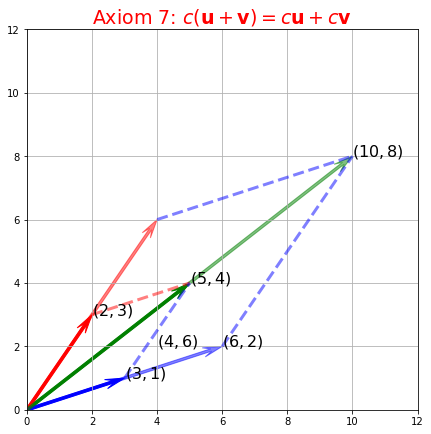

In [2]:
def vecSpaceAx7(u, v, c):
    fig, ax = plt.subplots(figsize = (7, 7))
    '''Syntax vecSpaceAx7(u, v, c), to demonstrate Axiom 7.'''
    ax.arrow(0, 0, u[0], u[1], color = 'red', width = .08, 
         length_includes_head = True,
         head_width = .3, # default: 3*width
         head_length = .6,
         overhang = .4)
    
    ax.arrow(0, 0, v[0], v[1], color = 'blue', width = .08, 
         length_includes_head = True,
         head_width = .3, # default: 3*width
         head_length = .6,
         overhang = .4)
    
    ax.arrow(0, 0, u[0]+v[0], u[1]+v[1], color = 'green', width = .08, 
         length_includes_head = True,
         head_width = .3, # default: 3*width
         head_length = .6,
         overhang = .4)
    
    ax.arrow(0, 0, c*u[0], c*u[1], color = 'red', width = .08, alpha=.5, 
         length_includes_head = True,
         head_width = .3, # default: 3*width
         head_length = .6,
         overhang = .4)
    
    ax.arrow(0, 0, c*v[0], c*v[1], color = 'blue', width = .08, alpha=.5, 
         length_includes_head = True,
         head_width = .3, # default: 3*width
         head_length = .6,
         overhang = .4)    
    ax.arrow(0, 0, c*(u[0]+v[0]), c*(u[1]+v[1]), color = 'green', width = .08, alpha=.5,  
         length_includes_head = True,
         head_width = .3, # default: 3*width
         head_length = .6,
         overhang = .4)
    
    ###########################Dashed Lines#################################
    point1 = [u[0], u[1]]
    point2 = [u[0] + v[0], u[1] + v[1]]
    line = np.array([point1, point2])
    ax.plot(line[:,0], line[:,1], ls = '--', lw = 3, color = 'red', alpha = .5)
    
    point1 = [v[0], v[1]]
    point2 = [u[0] + v[0], u[1] + v[1]]
    line = np.array([point1, point2])
    ax.plot(line[:,0], line[:,1], ls = '--', lw = 3, color = 'blue', alpha = .5)

    point1 = [c*v[0], c*v[1]]
    point2 = [c*(u[0] + v[0]),c*(u[1] + v[1])]
    line = np.array([point1, point2])
    ax.plot(line[:,0], line[:,1], ls = '--', lw = 3, color = 'blue', alpha = .5)

    point1 = [c*u[0], c*u[1]]
    point2 = [c*(u[0] + v[0]), c*(u[1] + v[1])]
    line = np.array([point1, point2])
    ax.plot(line[:,0], line[:,1], ls = '--', lw = 3, color = 'blue', alpha = .5)
    
    ####################################Text###############################
    
    ax.text(x = u[0], y = u[1], s = '$(%.0d, %.0d)$' % (u[0], u[1]), size = 16)
    ax.text(x = v[0], y = v[1], s = '$(%.0d, %.0d)$' % (v[0], v[1]), size = 16)
    ax.text(x = u[0]+v[0], y = u[1]+v[1], s = '$(%.0d, %.0d)$' % (u[0]+v[0], u[1]+v[1]), size = 16)    
    ax.text(x = c*u[0], y = c*v[1], s = '$(%.0d, %.0d)$' % (c*u[0], c*u[1]), size = 16) 
    ax.text(x = c*v[0], y = c*v[1], s = '$(%.0d, %.0d)$' % (c*v[0], c*v[1]), size = 16)     
    ax.text(x = c*(u[0]+v[0]), y = c*(u[1]+v[1]), s = '$(%.0d, %.0d)$' % (c*(u[0]+v[0]), c*(u[1]+v[1])), size = 16)     
    
    ax.set_title('Axiom 7: $c(\mathbf{u}+\mathbf{v})=c \mathbf{u}+c \mathbf{v}$', size = 19, color = 'red')
    
    ax.axis([0, np.max(c*u)+6, 0, np.max(c*v)+6])
    ax.grid(True)
    
if __name__ == '__main__':
    u = np.array([2,3])
    v = np.array([3,1])
    c = 2
    vecSpaceAx7(u, v, c)

Try different vectors.

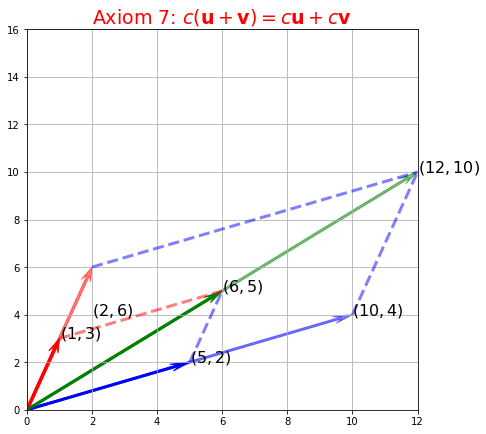

In [3]:
u = np.array([1, 3])
v = np.array([5, 2])
vecSpaceAx7(u, v, 2)

However the vector space has more general meaning than containing vectors, the functions and polynomials can also be in the vector space as we have show in the section of linear dependence. 

The difference is that the functions has infinite number of elements (continuous functions) in contrast to vectors.

We can demonstrate in the vector space for functions by plotting two trigonometric functions: $\sin(x)$ and $\cos{(x+1)}$ (stem plot), their addition in vector space is the pink shaded plot.

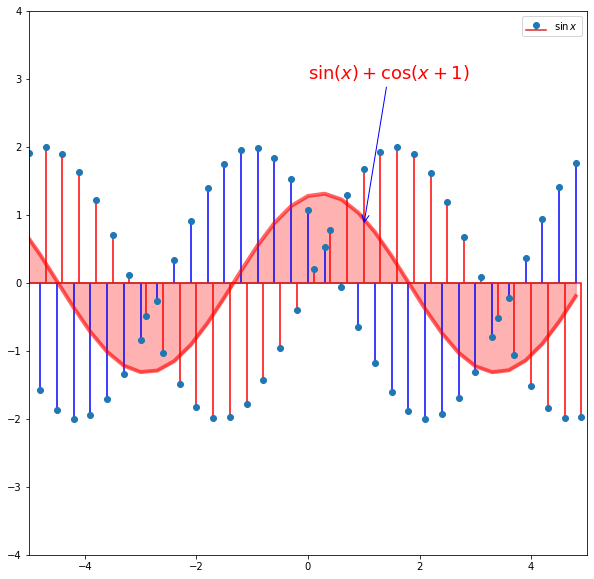

In [4]:
def funcVecSp(x1, x2, c):
    fig, ax = plt.subplots(figsize = (10, 10))
    '''Syntax funcVecSp(x), x is the domain, for instance, x = np.linspace(-3, 3, 20)'''
    y1 = c * np.sin(x1)
    ax.stem(x1, y1, use_line_collection = True, linefmt = 'red', label ='$\sin{x}$')
    
    y2 = c * np.cos(x2+1)
    ax.stem(x2, y2, use_line_collection = True, linefmt = 'blue')
    
    y3 = c*(np.sin(x1)+np.cos(x2+1))
    ax.plot(x2, y3, lw = 4, color = 'red', alpha = .6)
    
    ax.fill_between(x2, y3, 0, color  = 'red', alpha = .3)
    
    str1 = '$\sin(x)+\cos(x+1)$'
    ax.annotate(str1, xy = (1, 2*(np.sin(1)+np.cos(1+1))), xytext = (0, 3), weight = 'bold', color  =  'r', fontsize =18,
             arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3', color = 'b'))
    
    ax.axis([-5, 5, -4, 4])
    ax.legend()

if __name__ == '__main__':
    x1 = np.arange(-5, 5, 0.3)
    x2 = np.arange(-5.1, 4.9, 0.3)
    c = 2
    funcVecSp(x1, x2, c)

So we can say that $\sin{(x)}+\cos{(x+1)}$ is in the same vector space of $\sin{(x)}$ and $\cos{(x+1)}$.

# <font face="gotham" color="purple"> Subspace</font>

A subspace is one of the most important concept in linear algebra, fortunately nothing really mysterious.

A subspace resides in a vector space $V$,  we can denoted it as $H$. Only two properties needs to be verified:
1. $H$ has zero vector.
2. Closed under vector addition and scalar multiplication.

There are two facts of subspace:
1. Any line passes through $(0, 0)$ in $\mathbb{R}^2$ is a subspace of $\mathbb{R}^2$.
2. Any plane passes through $(0, 0, 0)$ in $\mathbb{R}^3$ is a subspace of $\mathbb{R}^3$.

Next we will visualize the subspace.

## <font face="gotham" color="purple"> Visualization of Subspace of $\mathbb{R}^2$</font>

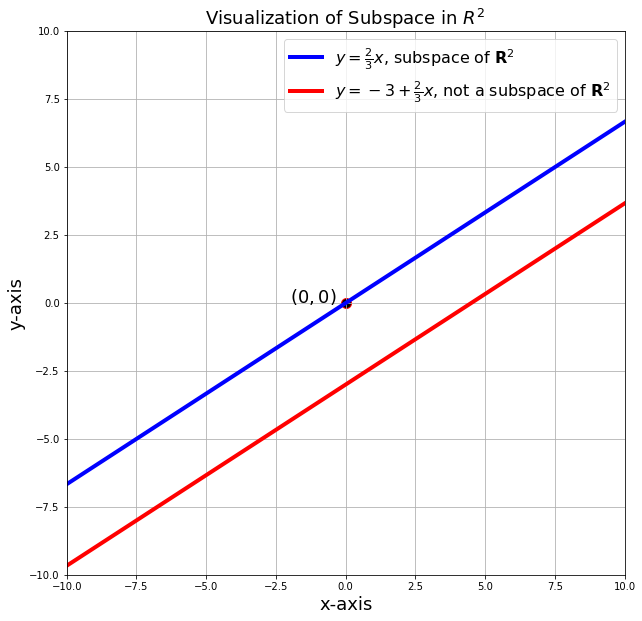

In [5]:
fig, ax = plt.subplots(figsize = (10, 10))
####################### Arrows #######################
x = np.arange(-10, 11, 1)
y = 4/6*x
ax.plot(x, y, lw = 4, color = 'blue',label = r'$y = \frac{2}{3}x$, subspace of $\mathbf{R}^2$')

y = -3+4/6*x
ax.plot(x, y, lw = 4, color = 'red',label = r'$y = -3+\frac{2}{3}x$, not a subspace of $\mathbf{R}^2$')

ax.grid(True)
ax.set_title('Visualization of Subspace in $R^2$ ', size = 18)
ax.scatter(0, 0, s= 100, fc = 'black', ec = 'red')
ax.text(-2, 0, '$(0,0)$',size = 18)
ax.legend(fontsize = 16)

ax.axis([-10, 10, -10, 10])

ax.set_xlabel('x-axis', size = 18)
ax.set_ylabel('y-axis', size = 18)
plt.show()

## <font face="gotham" color="purple"> Visualization of Subspace of $\mathbb{R}^3$</font>

Consider a span of two vectors $u = (1,-2,1)^T$ and $v=(2,1,2)^T$. The span of $(u,v)$ is a subspace of $\mathbb{R}^3$, where $s$ and $t$ are the scalars of the vectors.

$$
\left[
\begin{matrix}
x\\
y\\
z
\end{matrix}
\right]=
s\left[
\begin{matrix}
1\\
-2\\
1
\end{matrix}
\right]+
t\left[
\begin{matrix}
2\\
1\\
2
\end{matrix}
\right]=
\left[
\begin{matrix}
s+2t\\
-2s+t\\
s+2t
\end{matrix}
\right]
$$

We also plot a plan which is not a subspace by adding $2$ onto the third equation, i.e. $z= s+2t+2$.

Remember matplotlib does not have 3D engine, we have to pan to a proper angle to show the layout.

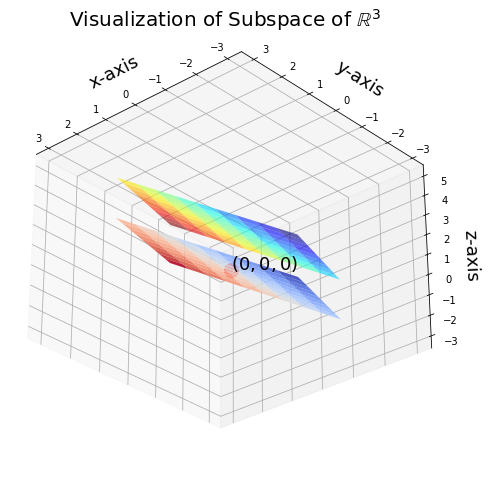

In [6]:
#%matplotlib notebook, use this only if you are in Jupyter Notebook
fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(111,projection='3d')

s = np.linspace(-1, 1, 10)
t = np.linspace(-1, 1, 10)
S, T = np.meshgrid(s, t)

X = S+2*T
Y = -2*S+T
Z = S+2*T

ax.plot_surface(X, Y, Z, alpha = .9,cmap=plt.cm.coolwarm)

Z2 = S+2*T+2 # this is not a subspace anymore
ax.plot_surface(X, Y, Z2, alpha = .6 ,cmap=plt.cm.jet)

ax.scatter(0,0,0, s = 200, color = 'red')
ax.text(0,0,0,'$(0,0,0)$',size = 18, zorder = 5)

ax.set_title('Visualization of Subspace of $\mathbb{R}^3$', x = .5, y = 1.1, size = 20)

ax.set_xlabel('x-axis', size = 18)
ax.set_ylabel('y-axis', size = 18)
ax.set_zlabel('z-axis', size = 18)

ax.view_init(elev=-29, azim=132)
plt.show()

As you can see the plane contains $(0,0,0)$ is a subspace, but the other plane is not.

# <font face="gotham" color="purple"> Span</font>

We have mentioned **span** quite a few times before, now we give formal definition of a span.

Use $\text{span}(S)$ to denote span of a subset $\{v_1, v_2,...,v_n\}$, which is a linear combination in vector space $V$.

$$
\text{span}(S)=\{c_1v_1+c_2v_2...+c_nv_n:c_1,...,c_n \in R\}
$$

The span of two vectors in $\mathbb{R}^3$ is a plane and any two vectors span a plane. Say, we have two vectors: $(3, 9, 2)$, $(1,7,5)$, any linear combination is a span, i.e. $s(3,9,2)^T+t(1,7,5)^T$.

For more general span, a basic fact of matrix multiplication can assist us in demonstrating:

$$
AB = A[b_1\ b_2\  b_3,...,b_4]=[Ab_1\ Ab_2\ Ab_3,...,Ab_p]
$$

where $A$ is the spanning set of vectors, $b_k$ is vector of weights for linear combination.We can generate a random matrix $B$ to form various linear combinations to visually verify if they are all contained in the spanned plane.

We define 
$$
A=\left[\begin{array}{rr}
3 & 1 \\
9 & 7 \\
2 & 5 
\end{array}\right]\qquad b_i\sim N(\mathbb{0}, 1)
$$

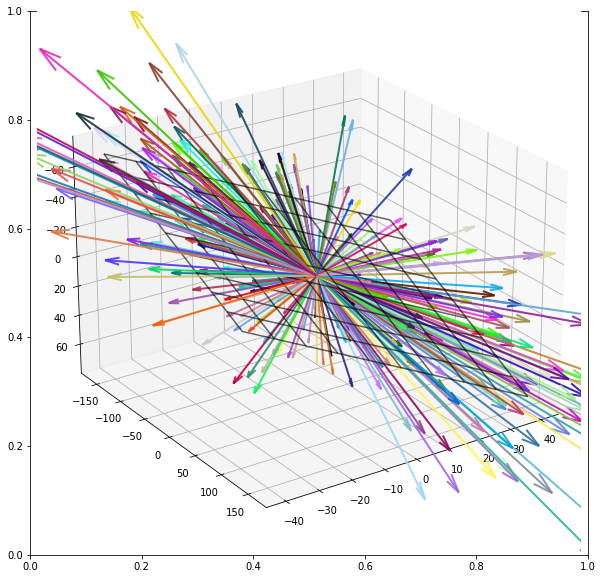

In [7]:
A = np.array([[3,9,2],[1,7,5]]).T

B = 10*np.random.randn(2, 300) # i = 300, i.e. 300 random weight vectors
vecs = A@B

s = np.linspace(-10, 10, 10)
t = np.linspace(-10, 10, 10)

S, T = np.meshgrid(s, t)

X = 3*S+T
Y = 9*S+7*T
Z = 2*S+5*T

fig, ax = plt.subplots(figsize = (10, 10))
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(X, Y, Z, linewidth = 1.5, color = 'k', alpha = .6)
ax.scatter(0,0,0, s =200, ec = 'red', fc = 'black')

colors = np.random.rand(vecs.shape[1],3)
for i in range(vecs.shape[1]):
    vec = np.array([[0, 0, 0, vecs[0,i], vecs[1,i], vecs[2,i]]])
    X, Y, Z, U, V, W = zip(*vec)
    ax.quiver(X, Y, Z, U, V, W, length=1,color = colors[i], normalize=False, arrow_length_ratio = .07, pivot = 'tail',
          linestyles = 'solid',linewidths = 2, alpha = .9)
ax.view_init(elev=-156, azim=-56)
plt.show()

Pan around the plot, we confirm that all the vectors are in the $\text{Span}(u,v)$.

## <font face="gotham" color="purple"> Span of $\mathbb{R}^3$</font>

Reproduce the code above, but we have three vectors: $(1,0,1)$, $(1,1,0)$, $(0,1,1)$. Again we create a random coefficent matrix to form different linear combinations.

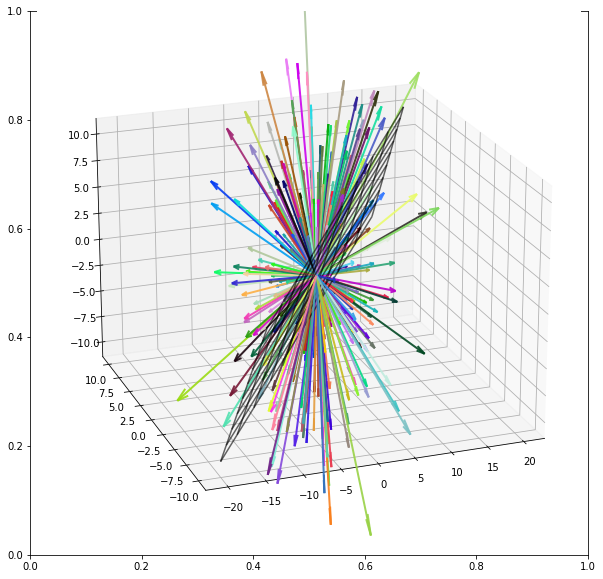

In [8]:
A = np.array([[1,0,1],[1,1,0],[0,1,1]]).T
B = 5*np.random.randn(3, 300)
vecs = A@B

s = np.linspace(-10, 10, 10)
t = np.linspace(-10, 10, 10)

S, T = np.meshgrid(s, t)

X = S+T
Y = T
Z = S

fig, ax = plt.subplots(figsize = (10, 10))
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(X, Y, Z, linewidth = 1.5, color = 'k', alpha = .6)
ax.scatter(0,0,0, s =200, ec = 'red', fc = 'black')

colors = np.random.rand(vecs.shape[1],3)
for i in range(vecs.shape[1]):
    vec = np.array([[0, 0, 0, vecs[0,i], vecs[1,i], vecs[2,i]]])
    X, Y, Z, U, V, W = zip(*vec)
    ax.quiver(X, Y, Z, U, V, W, length=1,color = colors[i], normalize=False, arrow_length_ratio = .07, pivot = 'tail',
          linestyles = 'solid',linewidths = 2, alpha = .9)
ax.view_init(elev=21, azim=-110)
plt.show()

The vectors are pointing every possible directions in $\mathbb{R}^3$, and all of them stay in the span of those three vectors.